Sprawozdanie  
Matematyka Konkretna  
Prowadzący: prof. dr hab. Vasyl Martsenyuk  
Laboratorium 3  
17.10.2023  
Regresja liniowa na podstawie SVD
Wariant 10  
Link do repozytorium: https://github.com/Maksiolo20/MK

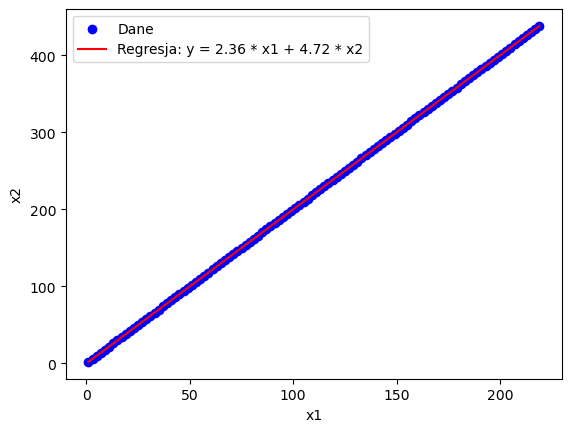

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Wczytaj dane z pliku CSV
data = pd.read_csv('war10.csv', sep=';')
# Replace commas with periods and convert to float
data['y'] = data['y'].str.replace(',', '.', regex=True).astype(float)
# Convert the column to integers
data['y'] = data['y'].astype(int)
# # Split the values in the 'x1;x2;y' column and create separate
#columns
#data[['x1', 'x2', 'y']] = data['x1;x2;y'].str.split(';',
#expand=True)
# # Wyodrębnij kolumny x1, x2 i y jako numpy arrays
x1 = data['x1'].values
x2 = data['x2'].values
y = data['y'].values
# Stwórz macierz X, dodając kolumnę jedynek dla wyrazu wolnego
X = np.column_stack((x1, x2, np.ones_like(x1)))
# Oblicz macierz pseudo-odwrotną
X_pseudo_inv = np.linalg.pinv(X)
# Oblicz współczynniki regresji a i b
b = np.dot(X_pseudo_inv, y)
# Wartości współczynników a i b
a, b = b[0], b[1]
# Wygeneruj punkty na wykresie regresji
x1_reg = np.linspace(min(x1), max(x1), 100)
x2_reg = np.linspace(min(x2), max(x2), 100)
y_reg = a * x1_reg + b * x2_reg
# Rysuj dane oraz regresję
plt.scatter(x1, x2, c='blue', label='Dane')
plt.plot(x1_reg, x2_reg, c='red', label=f'Regresja: y = {a:.2f} * x1 + {b:.2f} * x2')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()